# Homework 4

## Solution to Problem 2

With $N > d_{vc}$ we can use the approximation $m_H(N) = N^{d_{vc}}$ as described in Problem 1. 

- Note that [c] and [d] are implicit bounds in $\epsilon$ . For this we can use a numeric solver, see end of this Python notebook.

- Also note that with $m_H(N) = N^{d_{vc}}$ we have $m_H(2N) = (2N)^{d_{vc}}$.

- For the Devroye bound we can use the simplification $\ln \left[ m_H(N^2) \right] = \ln \left[ (N^2)^{d_{vc}} \right] = \ln \left[ N^{2d_{vc}} \right] = 2d_{vc} \ln ( N ) $ to accomodate for the large numbers.


**[a] Original VC bound:** 

$$\epsilon \leq \sqrt{\frac{8}{N} \ln \frac{4m_H(2N)}{\delta}}$$




**[b] Rademacher Penalty Bound:**

$$ \epsilon \leq \sqrt{\frac{2 \ln(2N m_H(N))}{N}} + \sqrt{\frac{2}{N}\ln \frac{1}{\delta}} + \frac{1}{N}$$



**[c] Parrondo and Van den Broek:**

$$ \epsilon \leq \sqrt{ \frac{1}{N} (2\epsilon + \ln \frac{6m_H(2N)}{\delta}) } $$


**[d] Devroye**

$$ \epsilon \leq \sqrt{ \frac{1}{2N} (4 \epsilon (1 + \epsilon) + \ln \frac{4m_H(N^2)}{\delta}) } $$

**[e] They are all equal**

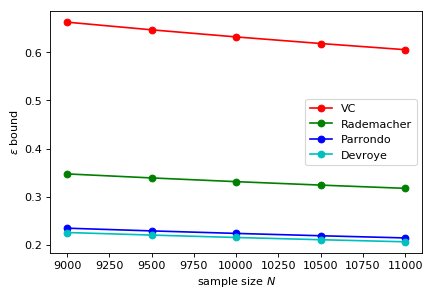

In [1]:
import math
import matplotlib.pyplot as plt
from scipy import optimize


def vc(N, d=50, delta=0.05):
    return math.sqrt( 8/N * math.log(4 / delta * (2*N)**d)  )
    
def rademacher(N, d=50, delta=0.05):
    return math.sqrt(2/N * math.log(2 * N * (N)**d )) + math.sqrt(-2/N * math.log(delta)) + 1/N

def parrondo(N, d=50, delta=0.05):
    f = lambda eps: math.sqrt((2*eps + math.log(6/delta * (2*N)**d))/N) - eps
    return optimize.brentq(f, 0, 1) 

def devroye(N, d=50, delta=0.05):
    f = lambda eps: math.sqrt((4*eps*(1+eps) + math.log(4/delta) + 2*d*math.log(N))/(2* N)) - eps
    return optimize.brentq(f, 0, 1) 


xs = range(9000, 11001, 500)
ys_vc = [vc(N) for N in xs]
ys_rademacher = [rademacher(N) for N in xs]
ys_parrondo = [parrondo(N) for N in xs]
ys_devroye = [devroye(N) for N in xs]


fig1 = plt.figure(1, dpi=80)
plt.plot(xs, ys_vc, 'ro-', label='VC')
plt.plot(xs, ys_rademacher, 'go-', label='Rademacher')
plt.plot(xs, ys_parrondo, 'bo-', label='Parrondo')
plt.plot(xs, ys_devroye, 'co-', label='Devroye')
plt.xlabel(r'sample size $N$')
plt.ylabel(r'$\epsilon$ bound')
plt.legend()
plt.show()




**Answer:** At $N = 10,000$ the Devroye bound is the smallest, so answer **2[d]** Devroye is correct.

# Numerical solvers

### WolframAlpha
We can also compute the $\epsilon$ values for the Parrondo and Devroye bound with WolframAlpha.

**Parrondo bound**

![parrondo_WolframAlpha](figures/hw4_pr2_parrondo2_WolframAlpha.png)

**Devroye bound**

![parrondo_WolframAlpha](figures/hw4_pr2_devroye_WolframAlpha.png)

___________________

### Brent's method in SciPy

For Python we can use the numerical solver using Brent's method: `scipy.optimize.brentq` . It finds the roots of a function: [Example 1](https://stackoverflow.com/questions/6519380/find-roots-of-a-function-a-xn-bx-c-0-where-n-isnt-an-integer-with-numpy) and [example 2](https://stackoverflow.com/questions/40920720/finding-root-of-two-functions-with-scipy-optimize-brentq) .

**Ghost Problem**

Let's say you wanted to find solutions of the equation $x = 3 \cos(0.5 x)$ .

**Solution**

This is the same as

- $x - 3  \cos(0.5 x) = 0$

You can interpret the left hand side as a function $f(x)$, so you have

- $f(x) = x - 3 \cos(0.5 x) = 0$

$f(x) = 0$ means you are looking for the roots for the function $f$. In Python you would use the following code:

```
from scipy import optimize
import math

def f(x):
    return x - 3 * math.cos(0.5*x)

min_x = 0
max_x = 10

root = optimize.brentq(f, min_x, max_x)
print(root)
```

The program returns the solution $x = 1.82971$.

You can also solve it in Wolframalpha:

https://www.wolframalpha.com/input/?i=x+%3D%3D+a+*+cos(b*x),+a+%3D+3,+b%3D0.5,+solve+for+x

![Ghost_problem](figures/hw4_pr2_ghost_problem_WolframAlpha.png)